In [1]:
# importing some libraries
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
import sqlite3

In [5]:
# making connection
con = sqlite3.connect(r"E:\DS\nlp_project\password_data.sqlite")

In [8]:
data = pd.read_sql_query('SELECT * FROM Users',con)

In [9]:
data.shape

(100000, 3)

In [10]:
data.head(3)

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1


## Let's perform data cleaning processes  
Here we have to deal some of the challenges such as :  
    1. check wether we have duplicate rows or not .  
    2. check the missing values .  
    3. check wether we have irrelevant data or not.  
    4. check the relevant column we have or not .  
    5. check the data types .

Above we see we really don't need the index column in this data frame so its better we drop it  

In [12]:
data.drop(['index'],axis=1,inplace=True)

In [13]:
data.columns

Index(['password', 'strength'], dtype='object')

In [15]:
# lets check duplicate values
data.duplicated().sum()

0

In [16]:
# now check null values
data.isnull().any().sum()

0

In [17]:
# now we check data types 
data.dtypes

password    object
strength     int64
dtype: object

In [18]:
data['strength'].unique()

array([1, 2, 0], dtype=int64)

Everything is okey and its good to go forward

## Sementic Analysis  
check the password holds :  
    1. How many numaric character in it .  
    2. How many upper case character .  
    3. How many lower case character .  
    4. How many title-case character .  
    5. How many special caharcters .

In [21]:
# checking numaric char
data[data['password'].str.isnumeric()].shape

(26, 2)

In [22]:
# checking upper case char 
data[data['password'].str.isupper()].shape

(1506, 2)

In [23]:
# checking lower case char 
data[data['password'].str.islower()].shape

(86678, 2)

In [25]:
# Checking alpha-numeric chars
data[data['password'].str.isalnum()].shape

(97203, 2)

In [26]:

import string


In [27]:
# checking spacial chars 
def find_sementics(row):
    for char in row :
        if char in string.punctuation:
            return 1
        else :
            pass
        

In [29]:
data[data['password'].apply(find_sementics)==1].shape

(2663, 2)

## Applying Feature Engineering

In [31]:
data['length']= data['password'].str.len()

In [32]:
data.head(2)

,password,strength,length
0,zxe870819,1,9
1,xw46454nr23l,1,12


In [33]:
# frequency of lower case and also we normanlie it 
def freq_lower_case(row):
    return len([char for char in row if char.islower()])/len(row)

In [34]:
# for upper case 
def freq_upper_case(row):
    return len([char for char in row if char.isupper()])/len(row)

In [35]:
# for numerical
def freq_numerical(row):
    return len([char for char in row if char.isdigit()])/len(row)

In [36]:
data['lower_case_freq'] = np.round(data['password'].apply(freq_lower_case),3)

In [37]:
data['upper_case_freq'] = np.round(data['password'].apply(freq_upper_case),3)

In [38]:
data['numeric_freq'] = np.round(data['password'].apply(freq_numerical),3)

In [45]:
# now for spacial character
def freq_spacial_case(row):
    spacial_chars = []
    for char in row:
        if not char.isalpha() and not char.isdigit():
            spacial_chars.append(char)
    return len(spacial_chars)

In [46]:
data['spacial_char_freq'] = np.round(data['password'].apply(freq_spacial_case),3)

In [51]:
data['spacial_char_freq'] = data['spacial_char_freq']/data['length']

In [52]:
data.head()

,password,strength,length,lower_case_freq,upper_case_freq,numeric_freq,spacial_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478
4,c443balg,1,8,0.625,0.0,0.375,0.000000


## Performing data analysis

In [53]:
data.columns

Index(['password', 'strength', 'length', 'lower_case_freq', 'upper_case_freq',
       'numeric_freq', 'spacial_char_freq'],
      dtype='object')

In [55]:
import warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [142]:
cols = ['length', 'lower_case_freq', 'upper_case_freq',
       'numeric_freq', 'spacial_char_freq']

for col in cols:
    print(col)
    print(data[[col , 'strength']].groupby(['strength']).agg(['min','max','mean','median']))

length
         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0
lower_case_freq
         lower_case_freq                        
                     min    max      mean median
strength                                        
0                    0.0  1.000  0.708050  0.714
1                    0.0  0.923  0.630067  0.667
2                    0.0  0.917  0.424679  0.400
upper_case_freq
         upper_case_freq                        
                     min    max      mean median
strength                                        
0                    0.0  1.000  0.012872  0.000
1                    0.0  0.923  0.007915  0.000
2                    0.0  0.889  0.367633  0.429
numeric_freq
         numeric_freq                        
                  min    max      mean median
strength                          

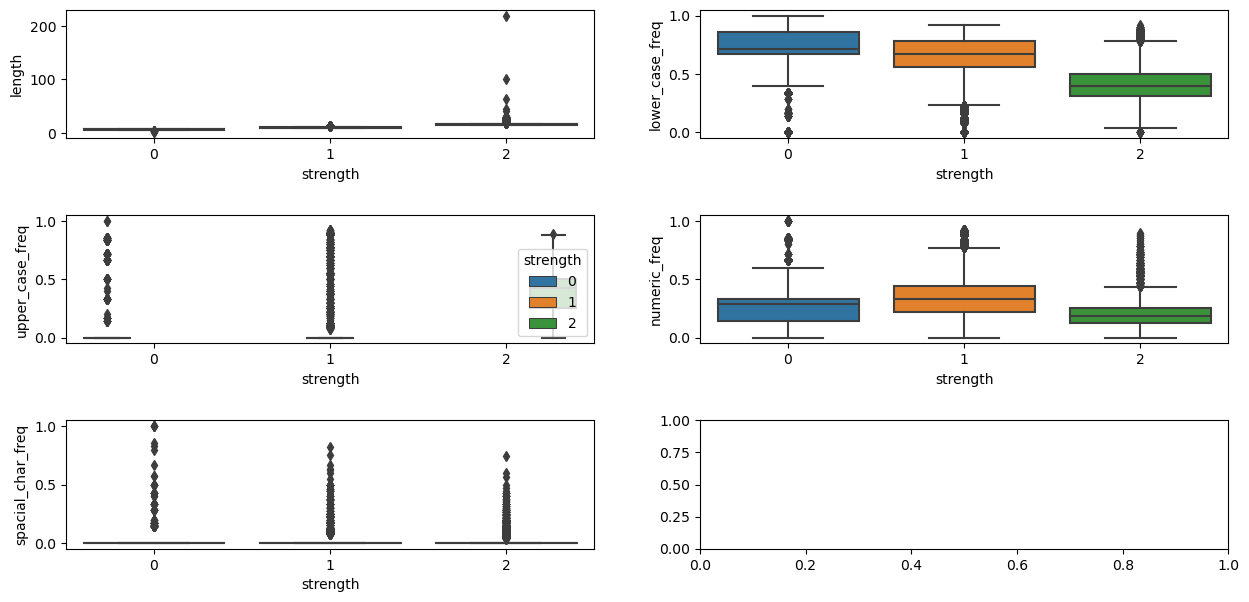

In [78]:
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6))=plt.subplots(3,2,figsize=(15,7))
sns.boxplot(x='strength',y='length',ax=ax1,data=data)
sns.boxplot(x='strength',y='lower_case_freq',ax=ax2,data=data)
sns.boxplot(x='strength',y='upper_case_freq',hue='strength',ax=ax3,data=data)
sns.boxplot(x='strength',y='numeric_freq',ax=ax4,data=data)
sns.boxplot(x='strength',y='spacial_char_freq',ax=ax5,data=data)
plt.subplots_adjust(hspace=0.6)
plt.show()

## Feature importance   
we are going to plot a distribution plot or voilinplot and it is important to note that i.e. if there is overlapping of the features in the distribution plot that means that feature is not important for the ML model

In [93]:
def get_dist(data,feature):
    plt.figure(figsize=(12,8))
    plt.subplot(1,2,1)
    sns.violinplot(x='strength',y=feature,data=data)
    
    plt.subplot(1,2,2)
    sns.distplot(data[data['strength']==0][feature],color='red',label='0',hist=False)
    sns.distplot(data[data['strength']==1][feature],color='blue',label='1',hist=False)
    sns.distplot(data[data['strength']==2][feature],color='yellow',label='2',hist=False)
    plt.legend()
    plt.show()

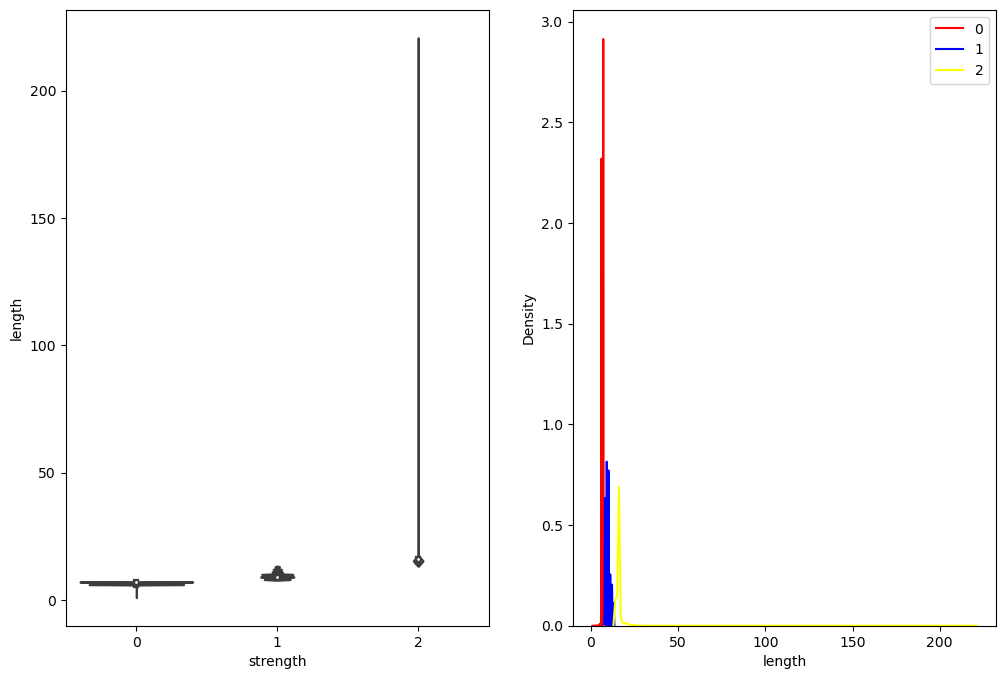

In [94]:
get_dist(data,'length')

Here we see that this ['length'] column is important

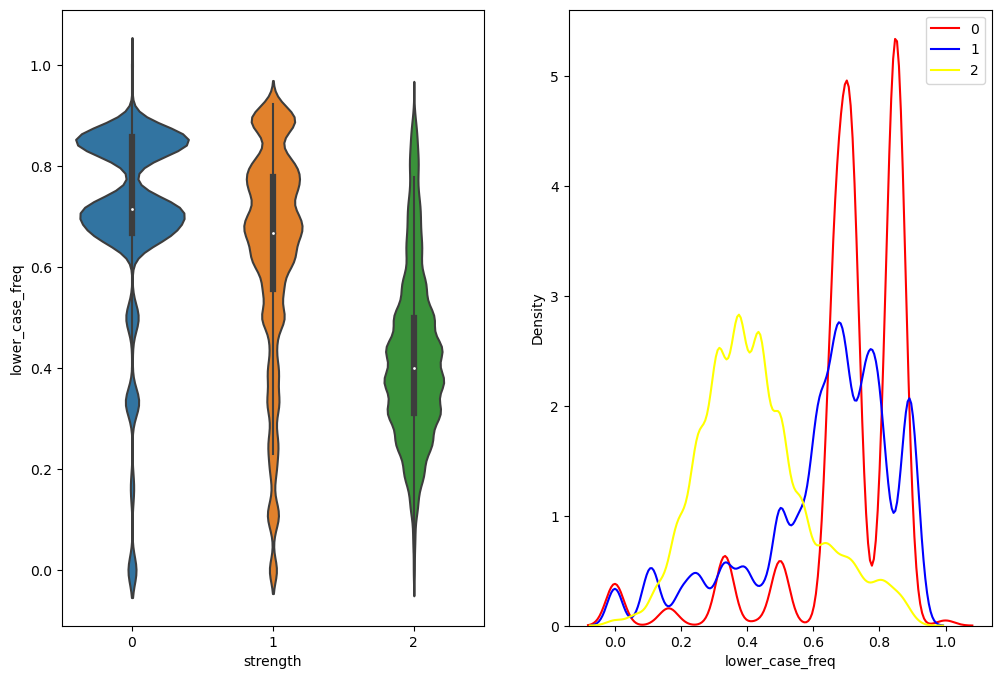

In [95]:
get_dist(data,'lower_case_freq')

this column also seems important for the model building

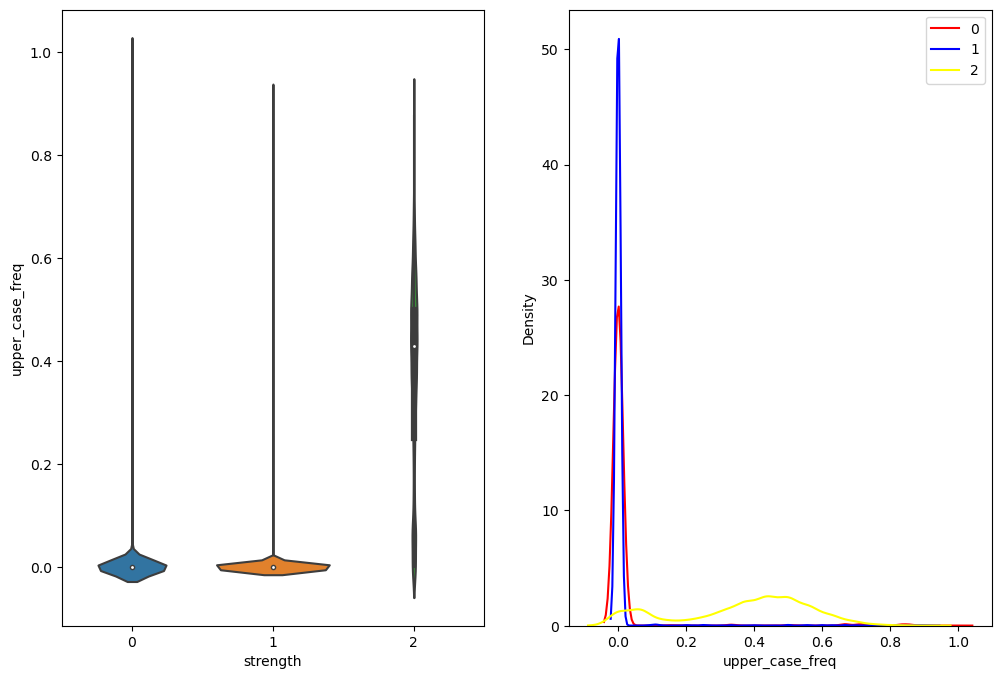

In [96]:
get_dist(data,'upper_case_freq')

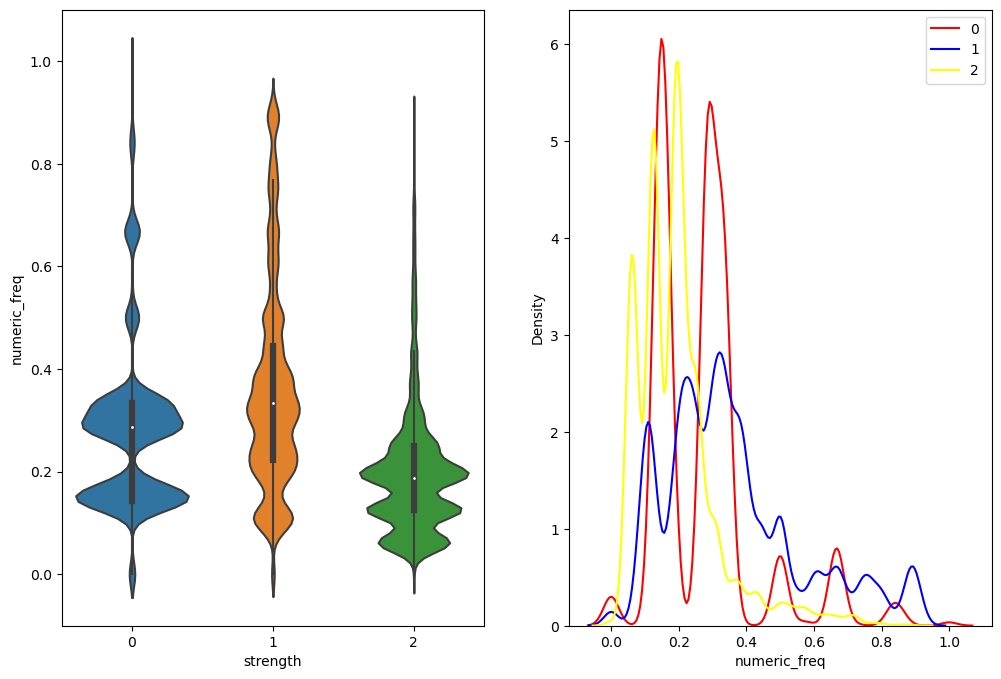

In [97]:
get_dist(data,'numeric_freq')

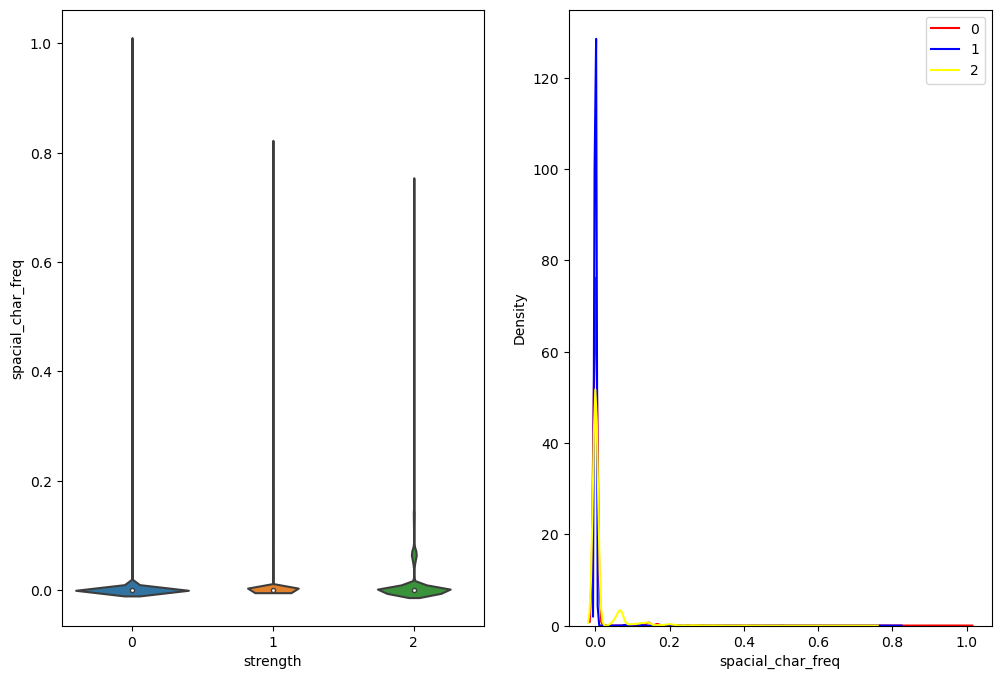

In [98]:
get_dist(data,'spacial_char_freq')

here these three features are not seems such important as we see overlapping  above 

## Intution behind TF-IDF  
**TF stands for Term Frequency**  
**IDF stands for Inverse Document Frequency**  
Simply we can explain that TF-IDF gives the vector representation of data that we have to pass to the ML algorithm.

In [100]:
# Applying TF-IDF 
dataframe = data.sample(frac=1)
x = list(dataframe['password'])

In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [106]:
vectorize = TfidfVectorizer(analyzer = 'char')

In [107]:
idf = vectorize.fit_transform(x)


In [108]:
idf.shape

(100000, 99)

In [109]:
idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**Sparse matrix** : In genral the matrix which have most of the values as 0 such matrix is called sparse matrix

In [111]:
# now convert it into dataframe
df2 = pd.DataFrame(idf.toarray(),columns=vectorize.get_feature_names_out())

In [112]:
df2.head()

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


above we have concluded that the 2 columns i.e. ['length'] and ['lower_case_freq'] have their importance where others are not such important so just concate these 2 columns in this dataframe

In [113]:
df2['length'] = dataframe['length']
df2['lower_case_freq'] = dataframe['lower_case_freq']
df2.head(2)

,,,,,,,,,!,#,...,õ,ö,÷,ú,ü,ý,þ,›,length,lower_case_freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.417


## Model building

In [117]:
y = dataframe['strength']

In [115]:
from sklearn.model_selection import train_test_split

In [118]:
x_train,x_test,y_train,y_test = train_test_split(df2,y,test_size=0.20)

In [125]:
from sklearn.linear_model import LogisticRegression

In [127]:
clf = LogisticRegression(multi_class='multinomial')

In [128]:
clf.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial')

In [130]:
y_pred = clf.predict(x_test)

**Checking the accuracy of the model**

In [131]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [132]:
accuracy_score(y_test,y_pred)

0.79765

we have a good and satisfying accuracy score wo we can say that the model is performing well

In [134]:
confusion_matrix(y_test,y_pred)

array([[  672,  2094,     2],
       [  541, 13922,   286],
       [   64,  1060,  1359]], dtype=int64)

In [135]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.24      0.33      2768
           1       0.82      0.94      0.87     14749
           2       0.83      0.55      0.66      2483

    accuracy                           0.80     20000
   macro avg       0.72      0.58      0.62     20000
weighted avg       0.78      0.80      0.77     20000



**Example as predicting the strngth of password entered by any user**

In [136]:
def predict():
    password = input('Enter the password :')
    sample_array = np.array([password])
    sample_matrix = vectorize.transform(sample_array)
    
    length_pass = len(password)
    length_normalised_lowercase = len([char for char in password if char.islower()])/len(password)
    
    new_matrix2 = np.append(sample_matrix.toarray() , (length_pass , length_normalised_lowercase)).reshape(1,101)
    result = clf.predict(new_matrix2)
    
    if result == 0:
        return "Password is weak"
    elif result == 1:
        return "Password is Normal"
    else:
        return "Password is Strong"
    

In [137]:
predict()

Enter the password :hfhg#2@1545565


'Password is Normal'

In [138]:
predict()

Enter the password :ASJD2312@!#@!sdf4ef85sfaf4af45


'Password is Strong'

In [139]:
predict()

Enter the password :ashu


'Password is weak'